In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
from pyarrow import parquet

import matplotlib.pyplot as plt

In [2]:
def get_rel_ebs(table_name):
    if table_name == "ethylene_methane":
        rel_ebs = [1.0] * 8 + [0.01] * 8
        rel_ebs[1] = 0.01
        parquet_file_or_folder = "../datasets/gas_sensor/ethylene_methane.parquet"
    elif table_name == "ethylene_CO":
        rel_ebs = [1.0] * 8 + [0.01] * 8
        parquet_file_or_folder = "../datasets/gas_sensor/ethylene_CO.parquet"
    elif table_name == "heavy_drinking":
        rel_ebs = [10.0] * 3
        parquet_file_or_folder = (
            "../datasets/heavy_drinking/all_accelerometer_data_pids_13.parquet"
        )
    else:
        raise ValueError(f"Unsupported Table Name: {table_name}")
    rel_ebs = [rel_eb * 1e-2 for rel_eb in rel_ebs]
    return rel_ebs, parquet_file_or_folder


def load_data(table_name):
    rel_ebs, path = get_rel_ebs(table_name)
    arrow_table = parquet.read_table(path)
    
    return arrow_table, rel_ebs

In [7]:
table, rel_ebs = load_data("ethylene_methane")
df = table.to_pandas()
print(df.describe())

pyarrow.Table
sensor_1: float
sensor_2: float
sensor_3: float
sensor_4: float
sensor_5: float
sensor_6: float
sensor_7: float
sensor_8: float
sensor_9: float
sensor_10: float
sensor_11: float
sensor_12: float
sensor_13: float
sensor_14: float
sensor_15: float
sensor_16: float
----
sensor_1: [[-41.98,-46.5,-36.16,-50.36,-37.3,...,2164.89,2159.59,2165.13,2144.69,2155.99],[2168.99,2163.69,2161.28,2156.95,2168.26,...,2260.78,2258.09,2255.4,2256.38,2256.62],...,[2673.01,2666.74,2663.6,2672.48,2668.82,...,2687.66,2685.04,2697.1,2713.13,2669.09],[2691.59,2696.58,2688.19,2683.73,2678.5,...,2341.81,2345.78,2350.25,2348.01,0]]
sensor_2: [[2067.64,2067.88,2055.81,2053.68,2081.17,...,1915.29,1901.21,1906.28,1910.44,1891.77],[1903.52,1898.44,1894.3,1897.98,1902.82,...,1846.6,1839.98,1839.75,1843.86,1842.03],...,[1613.05,1614.81,1611.95,1612.61,1609.32,...,1599.68,1619.42,1602.96,1597.92,1601.65],[1607.56,1608.22,1600.55,1602.52,1595.73,...,1605.37,1604.06,1594.86,1598.8,0]]
sensor_3: [[-37.13,-28.5

In [10]:
corr = df.corr().abs()
print(corr)

           sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  \
sensor_1   1.000000  0.265413  0.542034  0.517308  0.007993  0.049576   
sensor_2   0.265413  1.000000  0.005243  0.001256  0.046235  0.046180   
sensor_3   0.542034  0.005243  1.000000  0.999062  0.731056  0.691825   
sensor_4   0.517308  0.001256  0.999062  1.000000  0.757826  0.719986   
sensor_5   0.007993  0.046235  0.731056  0.757826  1.000000  0.997572   
sensor_6   0.049576  0.046180  0.691825  0.719986  0.997572  1.000000   
sensor_7   0.607851  0.015256  0.982586  0.975786  0.639524  0.598875   
sensor_8   0.550245  0.008746  0.989380  0.986610  0.712419  0.675369   
sensor_9   0.968721  0.264702  0.594822  0.571079  0.049534  0.007566   
sensor_10  0.969345  0.269122  0.549758  0.524919  0.003960  0.044388   
sensor_11  0.753015  0.034028  0.914206  0.897211  0.402772  0.352848   
sensor_12  0.630890  0.008069  0.983286  0.975473  0.607913  0.564077   
sensor_13  0.016566  0.046809  0.721526  0.748406  

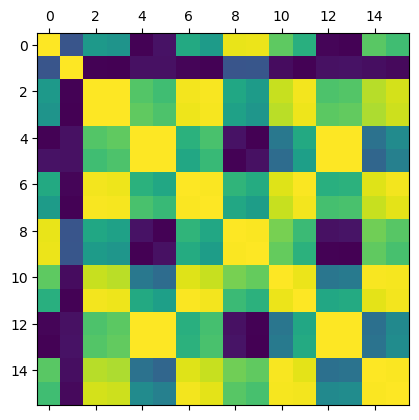

In [11]:
plt.matshow(corr)
plt.show()

In [3]:
table, rel_ebs = load_data("heavy_drinking")

In [4]:
table

pyarrow.Table
time: int64
x: double
y: double
z: double
----
time: [[0,0,1493733882409,1493733882455,1493733882500,...,1493736777617,1493736777619,1493736777627,1493736777631,1493736777641],[1493736777641,1493736777648,1493736777649,1493736777667,1493736777667,...,1493737821975,1493737821985,1493737822000,1493737822009,1493737822025],...,[1493824275576,1493824275577,1493824275595,1493824275601,1493824275620,...,1493828001393,1493828001417,1493828001443,1493828001470,1493828001494],[1493828001518,1493828001542,1493828001568,1493828001595,1493828001617,...,1493829248196,1493829248220,1493829248245,1493829248270,1493829248294]]
x: [[0,0,0.0758,-0.0359,-0.2427,...,-0,0.0005,0.0025,0.0112,-0.0004],[-0.0005,0.0014,-0.042,0,-0.0008,...,0.0091,-0,0.009,-0.0006,-0.0103],...,[0.0852343999999999,0.0007,0.0006,0.066538334,-0.0012,...,0.029138565,0.009840965,0.06714535,0.105213165,0.009912491],[0.08671951,0.06749725,0.087278366,0.030441284,0.1065979,...,-0.13395596,-0.100764275,-0.13185287,-0.14970

In [5]:
df = table.to_pandas()

In [6]:
df.describe()

,time,x,y,z
count,1.405757e+07,1.405757e+07,1.405757e+07,1.405757e+07
mean,1.493778e+12,-9.269848e-03,-7.168398e+06,7.168398e+06
std,5.640453e+08,9.540696e-01,3.528998e+07,3.528998e+07
min,0.000000e+00,-4.333507e+01,-1.809008e+08,-4.902300e+01
25%,1.493755e+12,-5.700000e-03,-4.500000e-03,-4.200000e-03
50%,1.493779e+12,-2.000000e-04,-2.000000e-04,6.100000e-03
75%,1.493801e+12,7.600000e-03,4.500000e-03,4.605889e-02
max,1.493829e+12,3.922540e+01,2.731123e+01,1.809008e+08


In [15]:
df.corr(method='spearman')

,time,x,y,z
time,1.000000,-0.016410,0.038047,0.146469
x,-0.016410,1.000000,-0.002553,0.110523
y,0.038047,-0.002553,1.000000,-0.053050
z,0.146469,0.110523,-0.053050,1.000000


In [16]:
df.corr()

,time,x,y,z
time,1.000000,-0.000330,0.005394,-0.005394
x,-0.000330,1.000000,0.058263,-0.058263
y,0.005394,0.058263,1.000000,-1.000000
z,-0.005394,-0.058263,-1.000000,1.000000


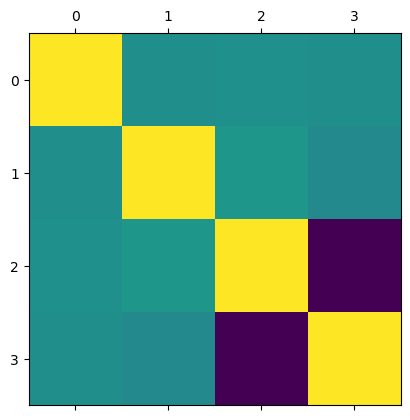

In [11]:
plt.matshow(df.corr())
plt.show()

In [17]:
df.iloc[:10,1:]

,x,y,z
0,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000
2,0.0758,0.0273,-0.0102
3,-0.0359,0.0794,0.0037
4,-0.2427,-0.0861,-0.0163
5,-0.2888,0.0514,-0.0145
6,-0.0413,-0.0184,-0.0105
7,-0.0413,-0.0001,0.0017
8,-0.0286,-0.0028,-0.0094
9,-0.0543,-0.0410,-0.0109
